In [ ]:
print(f"""
        Élève         : Vinicius Nascimento
        Num Étudiant  : 00A01916
        Date          : 18 mars 2025
        Classe        : Introduction a Securite des Intelligence Artificielle
        École         : ENSICAEN
        Formation     : CyIA Informatique 2eme année
""")


        Élève         : Vinicius Nascimento
        Num Étudiant  : 00A01916
        Date          : 18 mars 2025
        Classe        : Introduction a Securite des Intelligence Artificielle
        École         : ENSICAEN
        Formation     : CyIA Informatique 2eme année



In [1]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import json
import urllib.request

### ResNet18
ResNet18 is a variant of the Residual Network (ResNet) architecture with 18 layers, which was introduced to address the vanishing gradient problem in deep neural networks.
The architecture is designed to allow networks to be deeper, thus improving their ability to learn complex patterns in data.

[ResNet18 Documentation](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18)

In [2]:
# Downloading the Pre-trained Model

model = models.resnet18(pretrained = True)
model.eval() # Important : Set the model to evaluation mode

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
# Loading and Pre-processing Images
## Functions declarations

def load_and_preprocess_image(image_path):
    """ Loads an image, pre-processes it, and returns a PyTorch tensor.
            image_path  :  the relative or absolute path for a image file;
    """
    image = Image.open(image_path)
    transform = transforms.Compose([
    transforms.Resize(256) ,
    transforms.CenterCrop(224) ,
    transforms.ToTensor() ,
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std =[0.229, 0.224 ,0.225])
    ])
    image = transform ( image )
    return image . unsqueeze (0) # Add a batch dimension

def imshow(img):
    """ Helper function to display an image.
            img = receive a object image return by load_and_preprocess_image function;
    """
    img = img.clone()
    img -= torch.min(img)
    img /= torch.max(img)
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

tensor([[[[-1.3302, -1.3130, -1.2959,  ..., -1.4329, -1.4500, -1.4500],
          [-1.3302, -1.3130, -1.3302,  ..., -1.4158, -1.4158, -1.4158],
          [-1.3302, -1.3302, -1.3644,  ..., -1.4158, -1.3987, -1.4158],
          ...,
          [ 1.2899,  1.3927,  1.5125,  ...,  1.0844,  0.4337,  0.0398],
          [ 1.2728,  1.2899,  1.3927,  ...,  1.0844,  1.0502,  0.5022],
          [ 1.2557,  1.3927,  1.4440,  ...,  0.4851,  0.2624, -0.1999]],

         [[-1.1078, -1.1078, -1.1429,  ..., -1.1954, -1.2129, -1.2129],
          [-1.1078, -1.1078, -1.1253,  ..., -1.2129, -1.2129, -1.2129],
          [-1.1078, -1.0903, -1.1078,  ..., -1.2129, -1.1954, -1.2129],
          ...,
          [ 0.5378,  0.7479,  0.9580,  ...,  0.2752, -0.3725, -0.6176],
          [ 0.5028,  0.5903,  0.7479,  ...,  0.4328,  0.4328, -0.0574],
          [ 0.4853,  0.7129,  0.8704,  ..., -0.2850, -0.3725, -0.8452]],

         [[-1.0201, -1.0201, -1.0376,  ..., -1.0550, -1.0550, -1.0550],
          [-1.0201, -1.0201, -

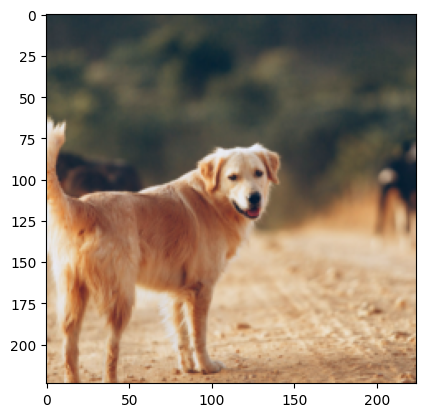

In [6]:
### Example usage
img_path = "dog.jpg"

image = load_and_preprocess_image(img_path) # Replace with your image path
print(image)
imshow(image[0]) # Show the image. Note the [0] since we have a batch dimension of 1.

In [7]:
# Download ImageNet Labels for discovery the class name

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"

response = urllib.request.urlopen(url)
labels = [line.strip() for line in response.readlines()]

In [8]:
# Making Predictions
## Functions declarations

def predict(image, model, topk=5):
    """ Predicts the top k classes for a given image.
            image   : tensor with data image;
            model   : type model used;
            topk    : optional parameter that specifies how many top predictions you want to receive;
    """
    with torch.no_grad(): # Disable gradient calculation for inference
        output = model (image)
        probabilities = torch.nn.functional.softmax(output[0],dim=0)
        topk_prob, topk_catid = torch . topk ( probabilities , topk)

        for i in range(topk):
            print(f" Prediction {i+1} : {topk_catid[i].item()} (Probability : {topk_prob[i].item():.4f} {labels[topk_catid[i].item()]})")

    return topk_prob , topk_catid

In [9]:
### Example usage

probs, classes = predict(image, model)
print(probs, classes)

 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
 Prediction 2 : 208 (Probability : 0.0535 b'Labrador retriever')
 Prediction 3 : 185 (Probability : 0.0516 b'Norfolk terrier')
 Prediction 4 : 212 (Probability : 0.0188 b'English setter')
 Prediction 5 : 213 (Probability : 0.0166 b'Irish setter')
tensor([0.7028, 0.0535, 0.0516, 0.0188, 0.0166]) tensor([207, 208, 185, 212, 213])


In [ ]:
def fgsm_attack(image, epsilon, model, target=None): # added target
    """ Generates an adversarial example using the FGSM attack.
          image   : Input image tensor to be perturbed.
          epsilon : Perturbation magnitude (controls the strength of the attack).
          model   : Neural network model used to compute gradients.
          target  : (Optional) Target label for a targeted attack. If None, performs untargeted attack.
    """
    targeted = False
    if target is None:
        target = np.random.randint(0, len(labels))
        print(f"Target is equal none. New randomic target = {target} thats represent {labels[target]}")
    else:
        # Targeted attack: use specified incorrect label
        if isinstance(target, int):
            target = torch.tensor([target])
        targeted = True

    target = torch.tensor([target])

    # Forward pass through the model to compute output
    output = model(image)
    image.requires_grad = True # Enable gradient tracking for the image

    output = model(image)
    loss = torch.nn.functional.cross_entropy(output,target)

    # Avoid grad acumulation, clear
    model.zero_grad()
    # Backpropagate to compute gradients
    loss.backward()

    image_grad = image.grad.data

    # Use cross-entropy loss. TARGET MUST BE A LONG TENSOR (INTEGER)
    if targeted:
        adv_img = image - epsilon * image_grad.sign()
    else:
        adv_img = image + epsilon * image_grad.sign()

    return adv_img

Target is equal none. New randomic target = 569 thats represent b'garbage truck'


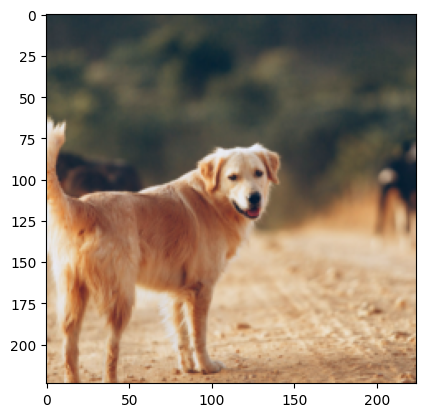

Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
 Prediction 2 : 208 (Probability : 0.0535 b'Labrador retriever')
 Prediction 3 : 185 (Probability : 0.0516 b'Norfolk terrier')
 Prediction 4 : 212 (Probability : 0.0188 b'English setter')
 Prediction 5 : 213 (Probability : 0.0166 b'Irish setter')


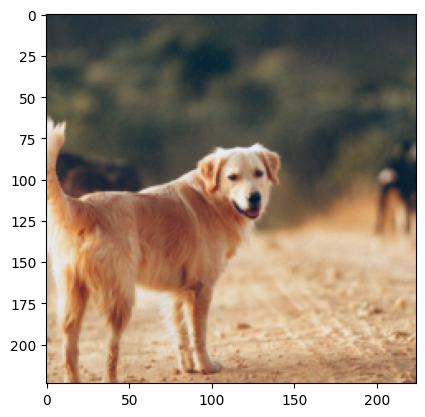

Perturbed Model : 
 Prediction 1 : 207 (Probability : 0.9907 b'golden retriever')
 Prediction 2 : 213 (Probability : 0.0025 b'Irish setter')
 Prediction 3 : 208 (Probability : 0.0025 b'Labrador retriever')
 Prediction 4 : 176 (Probability : 0.0016 b'Saluki')
 Prediction 5 : 222 (Probability : 0.0006 b'kuvasz')


In [14]:
perturbed_image = fgsm_attack(image, 0.02, model)
imshow(image[0])
print("Correct Model : ")
probs, classes = predict(image, model)
imshow(perturbed_image[0])
print("Perturbed Model : ")
probs, classes = predict(perturbed_image, model)

In [15]:
values = [x / 1000 for x in range(10, 1000, 100)]

for i in values:
    print(i)
    perturbed_image = fgsm_attack(image, i, model, 204) # 204 = b'Lhasa'
    print("Correct Model : ")
    probs, classes = predict(image, model, 1)
    print("Perturbed Model : ")
    probs, classes = predict(perturbed_image, model, 1)
    print("=============================")

0.01
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 207 (Probability : 0.9723 b'golden retriever')
0.11
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 207 (Probability : 0.8416 b'golden retriever')
0.21
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 207 (Probability : 0.6519 b'golden retriever')
0.31
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 212 (Probability : 0.4611 b'English setter')
0.41
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 212 (Probability : 0.5041 b'English setter')
0.51
Correct Model : 
 Prediction 1 : 207 (Probability : 0.7028 b'golden retriever')
Perturbed Model : 
 Prediction 1 : 212 (Probability : 0.3127 b'English setter')
0.61

Target is equal none. New randomic target = 160 thats represent b'Afghan hound'


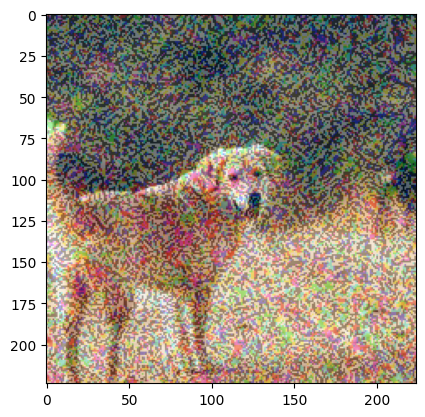

 Prediction 1 : 971 (Probability : 0.7445 b'bubble')


In [ ]:
perturbed_image = fgsm_attack(image, 0.90, model)
imshow(perturbed_image[0])
probs, classes = predict(perturbed_image, model, 1)

In [28]:
print("""
    - How does the size of the perturbation affect the attack success rate?
        [Vinicius]: As epsilon increases, the attack becomes more effective. Initially, the model remains confident in the correct prediction,
        but from around epsilon = 0.31, the model starts misclassifying the input. The success rate increases with larger epsilons, even reaching unrelated classes.

    - What happens when epsilon is too small?
        [Vinicius]: The model is sure about the correct prevision, and after pass the decision boundary makes a bad classification

    - What happens when epsilon is too large (the image becomes unrecognizable)
        [Vinicius]: The model predicts other completly different class, because the pertubation is too large and the image becomes unrecognizable

    - Can an adversarial example from one model fool another model?
        [Vinicius]: It is possible. This is known as the transferability property of adversarial examples.
        An adversarial image crafted for one model may still fool other models, especially if they have similar
        architectures or were trained on similar datasets.
""")


    - How does the size of the perturbation affect the attack success rate?
        [Vinicius]: As epsilon increases, the attack becomes more effective. Initially, the model remains confident in the correct prediction,
        but from around epsilon = 0.31, the model starts misclassifying the input. The success rate increases with larger epsilons, even reaching unrelated classes.
      
    - What happens when epsilon is too small?
        [Vinicius]: The model is sure about the correct prevision, and after pass the decision boundary makes a bad classification
      
    - What happens when epsilon is too large (the image becomes unrecognizable)
        [Vinicius]: The model predicts other completly different class, because the pertubation is too large and the image becomes unrecognizable

    - Can an adversarial example from one model fool another model?
        [Vinicius]: It is possible. This is known as the transferability property of adversarial examples.
        An adversarial